In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('NumPy: {}'.format(np.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Pandas: 1.0.3
NumPy: 1.18.2
Scikit-learn: 0.22.2.post1
Matplotlib: 3.2.1


In [0]:
from sklearn import datasets

# Load Dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

# generate Pandas DataFrame
df = pd.DataFrame(features)
df.columns = iris.feature_names

In [3]:
# print target and target names
print(target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# print data set information
print(df.shape)
print(df.head(20))

(150, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6         

In [5]:
# print data set descriptions and class distributions
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000


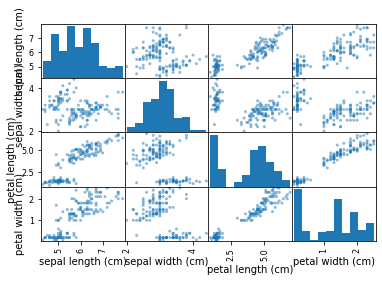

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# display scatter plot matrix
scatter_matrix(df)
plt.show()

In [0]:
# KMeans Clustering - Elbow Method to Determine Optimal Number of Clusters
from sklearn.cluster import KMeans

# empty x and y data lists
X = []
Y = []

for i in range(1,31):
    # initialize and fit the kmeans model 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    
    # append number of clusters to x data list
    X.append(i)
    
    # append average within-cluster sum of squares to y data list
    awcss = kmeans.inertia_ / df.shape[0]
    Y.append(awcss)

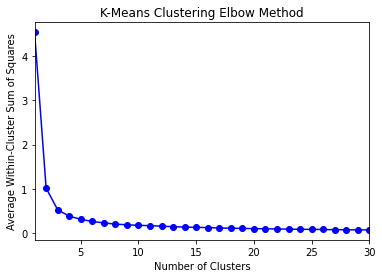

In [8]:
import matplotlib.pyplot as plt

# plot the x and y data
plt.plot(X,Y, 'bo-')
plt.xlim((1, 30))
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.title('K-Means Clustering Elbow Method')

# display the plot
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# perform principle component analysis
pca = PCA(n_components=2)
pc = pca.fit_transform(df)

# print new dimensions
print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [10]:
# re-fit kmeans model to principle components with appropriate number of clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

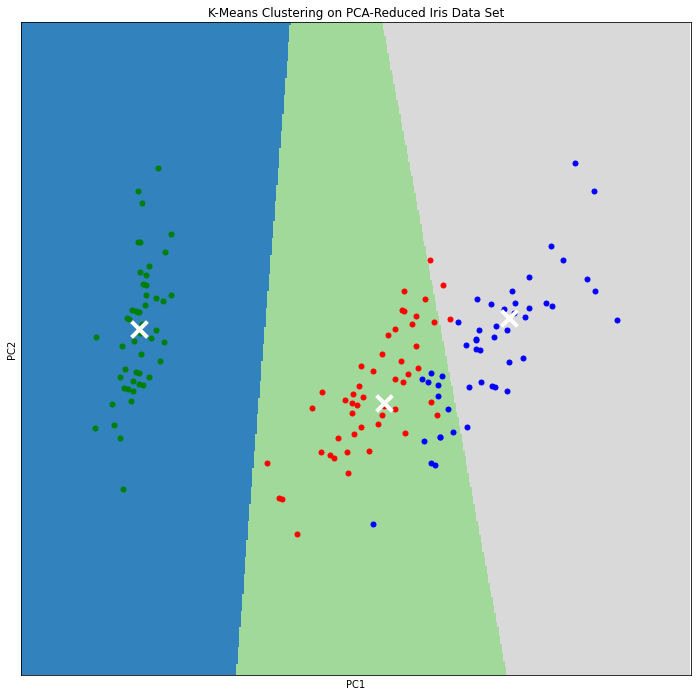

In [11]:
# Visualize high dimensional clusters using principle components

# set size for the mesh
h = 0.02 # determines quality of the mesh [x_min, x_max]x[y_min, y_max]

# generate mesh grid
x_min, x_max = pc[:, 0].min() - 1, pc[:, 0].max() + 1
y_min, y_max = pc[:, 1].min() - 1, pc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# generate color plot from results
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12, 12))
plt.clf()
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.tab20c,
          aspect = 'auto', origin = 'lower')

# plot the principle components on the color plot
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)

# plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4,
           color = 'w', zorder = 10)

# set plot title and axis limits
plt.title('K-Means Clustering on PCA-Reduced Iris Data Set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

# display the plot
plt.show()

In [12]:
from sklearn import metrics

# K Means clustering on Non Reduced Data
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(features)

# K Means clustering on PCA Reduced Data
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(pc)

# print metrics for Non reduced data 
print('Non Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans1.labels_)))

# print metrics for PCA reduced data
print('Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans2.labels_)))

Non Reduced Data
Homogeneity: 0.7514854021988338
Completeness: 0.7649861514489815
V-measure: 0.7581756800057784
Reduced Data
Homogeneity: 0.736419288125285
Completeness: 0.7474865805095325
V-measure: 0.7419116631817838


In [13]:
# to compare results further, print out the actual labels
print(kmeans1.labels_)
print(kmeans2.labels_)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
